In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from nn_dueling import DuelingNet
from nn import Net

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

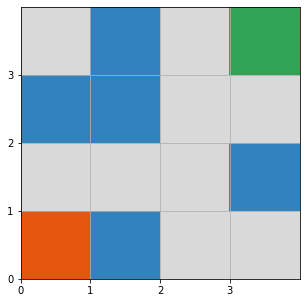

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=300,
    full_state=True,
)

In [4]:
target_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

policy_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

dqn = DQN(
    env=deterministic_env,
    env_type='vector',
    log_freq=100,
    train_freq=3,
    batch_size=50,
    w_sync_freq=10,
    memory_size=500,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=1000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_nn',
)

dqn.run()

Episode: 0, Reward: -46.25, Loss: 0
Episode: 100, Reward: -44.44999999999999, Loss: 8.799079895019531
Episode: 200, Reward: 4.75, Loss: 1.740583896636963
Episode: 300, Reward: 3.8, Loss: 0.7916826605796814
Episode: 400, Reward: 4.75, Loss: 0.03938932716846466
Episode: 500, Reward: 4.75, Loss: 0.22435373067855835
Episode: 600, Reward: 4.75, Loss: 0.5784944295883179
Episode: 700, Reward: 4.75, Loss: 0.07730183005332947
Episode: 800, Reward: 4.75, Loss: 0.2557855248451233
Episode: 900, Reward: 4.75, Loss: 0.031704794615507126


In [5]:
dqn.evaluate()

In [6]:
target_net = DuelingNet(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

policy_net = DuelingNet(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

dqn_dueling = DQN(
    env=deterministic_env,
    env_type='vector',
    log_freq=100,
    train_freq=3,
    batch_size=50,
    w_sync_freq=10,
    memory_size=500,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=1000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_nn',
)

dqn_dueling.run()

Episode: 0, Reward: -38.099999999999994, Loss: 0
Episode: 100, Reward: -13.700000000000003, Loss: 25.634159088134766
Episode: 200, Reward: 4.75, Loss: 3.032522201538086
Episode: 300, Reward: 4.75, Loss: 1.4773327112197876
Episode: 400, Reward: 4.75, Loss: 0.13913534581661224
Episode: 500, Reward: 4.75, Loss: 0.19013606011867523
Episode: 600, Reward: 4.75, Loss: 0.479308545589447
Episode: 700, Reward: 4.75, Loss: 1.9015517234802246
Episode: 800, Reward: 4.75, Loss: 0.12589195370674133
Episode: 900, Reward: 4.75, Loss: 0.01677093468606472


In [7]:
dqn_dueling.evaluate()

#### Training

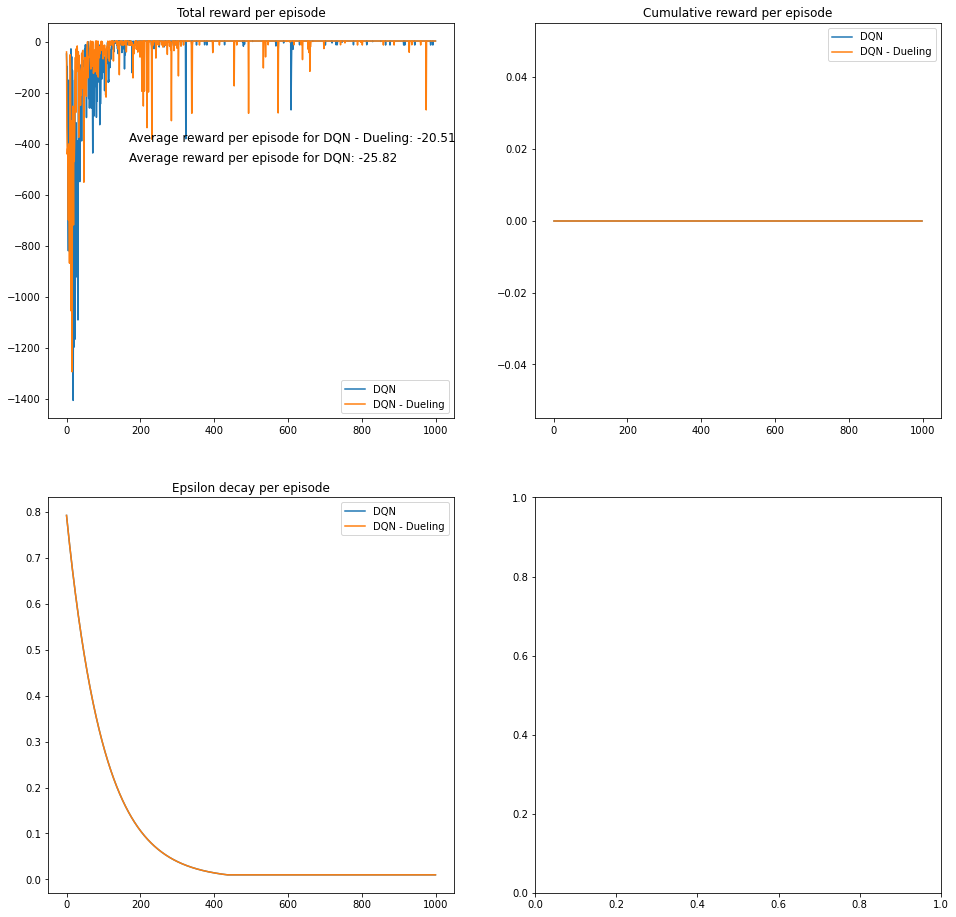

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))  

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards, label='DQN')
ax[0][0].text(0.2, 0.65, f'Average reward per episode for DQN: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')
ax[0][0].legend()

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards, label='DQN')
ax[0][1].set_title('Cumulative reward per episode')
ax[0][1].legend()

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()], label='DQN')
ax[1][0].set_title('Epsilon decay per episode')
ax[1][0].legend()


total_rewards_du = [log['reward'] for _, log in dqn_dueling.logs.items()]
mean_rewards_du = sum(total_rewards_du)/len(total_rewards_du)
ax[0][0].plot(range(dqn_dueling.episodes), total_rewards_du, label='DQN - Dueling')
ax[0][0].text(0.2, 0.7, f'Average reward per episode for DQN - Dueling: {round(mean_rewards_du, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')
ax[0][0].legend()

cumulative_rewards_du = [log['cumulative_reward'] for _, log in dqn_dueling.logs.items()]
ax[0][1].plot(range(dqn_dueling.episodes), cumulative_rewards_du, label='DQN - Dueling')
ax[0][1].set_title('Cumulative reward per episode')
ax[0][1].legend()

ax[1][0].plot(range(dqn_dueling.episodes), [log['epsilon'] for _, log in dqn_dueling.logs.items()], label='DQN - Dueling')
ax[1][0].set_title('Epsilon decay per episode')
ax[1][0].legend()